# Perceptron
The perceptron is an algorithm for binary classifier. Based on the inputs, it outputs two possible values, 0 or 1.

$$ 
f(x) =
\begin{cases}
    1,\ w \cdot x + b > 0 \\
    0,\ w \cdot x + b \leq 0
\end{cases}
$$

where $w$ and $x$ are vectors, $b$ is scalar bias.

The goal of the algorithm is to find $w$ and $b$ so that it classifies binary data properly.

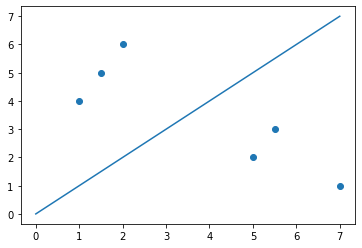

In [22]:
import matplotlib.pyplot as plt
import numpy as np

points1 = np.array([
    [1,4],
    [2,6],
    [1.5, 5]
]) # labeled as 1

points2 = np.array([
    [5,2],
    [7,1],
    [5.5, 3]
]) # labeled as 2

points = np.concatenate((points1, points2))

def draw(points, line=None):
    plt.scatter(points[:, 0], points[:, 1])

    if line != None:
        plt.plot(line[0], line[1])
    
    plt.show()

draw(points, [[0, 7], [0, 7]])


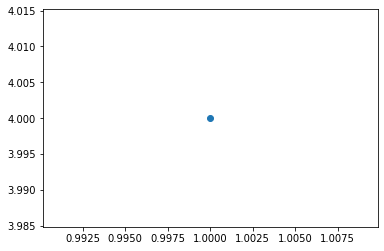

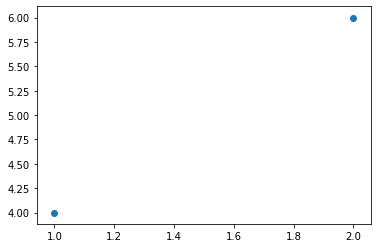

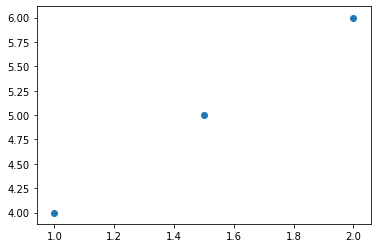

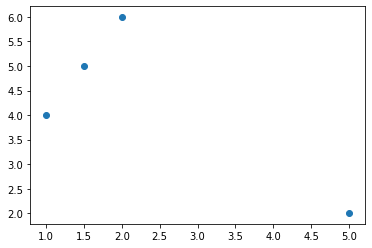

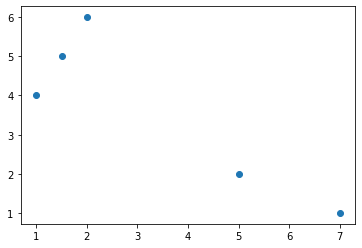

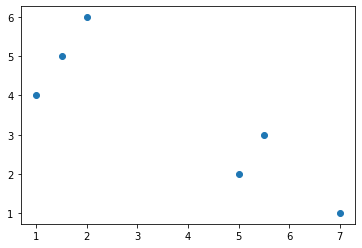

In [51]:
w = [0,0]

temp = []
for index, point in enumerate(points):
    dotProduct = np.dot(w, point)
    if point in points1 and dotProduct < 0:
        w = np.add(w, point)
    
    
    if point in points2 and dotProduct >= 0:
        w = np.add(w, np.negative(point))

    temp += [point]
    

    draw(np.array(temp))

